Very often, we are encountered by choices e.g. two hypothesis $H_1$ and $H_2$ and one of them could be true. We'll use a concrete example to analyse this situation.

For example, let's assume that following two histograms shows two populations; first is the response to a "skin test" in people who never develop T.B., and second is the response when the people eventually have T.B..

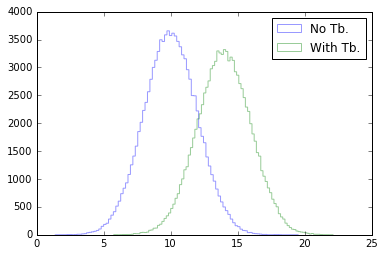

In [55]:
%matplotlib inline
import pylab
import numpy as np
h1 = np.random.normal( 10, 2.0, 100000) # noise or no-tumor
h2 = np.random.normal( 14, 2.0, 100000) # with tumor
pylab.hist( h1, 100, label = 'No Tb.', histtype = 'step',  alpha = 0.4)
pylab.hist( h2, 100, label = 'With Tb.', histtype = 'step', alpha = 0.4 )
pylab.legend( )

Now you have a sample or patient who has the response value of 11.5.

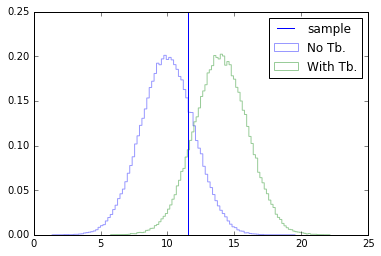

In [56]:
a1, b1, p1 = pylab.hist( h1, 100, normed = True, label = 'No Tb.', histtype = 'step',  alpha = 0.4)
a2, b2, p2 = pylab.hist( h2, 100, normed = True, label = 'With Tb.', histtype = 'step', alpha = 0.4 )
pylab.axvline( 11.5, label = 'sample' )
# TODO: fill in-between.
pylab.legend( )

Now, will you send this patient for further diagnostics or not? You can make two kind of errors:

- **Type 1** You did not send him for diagnostic and patient developed the TB. (it cost the patient his life). 
- **Type 2** You send him for further diagnostic and patient never develops TB.

There is simply no fool-proof method to avouid all errors. Support you have a low threshold and you send almost everyone to the further diagnostic. It means the you never miss a TB case but you have so many false alarm. On the other hand if you choose a high threshold then you almost never send anyone for further diagnostic. This way you never have false alarm but you also miss many real TB.

# Discriminability index (d')

It is defined as $d' = \frac{separation}{spread}$

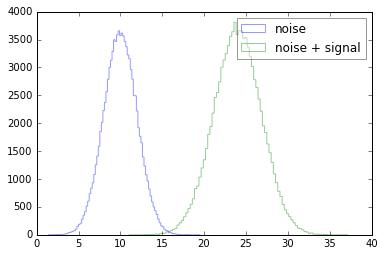

In [60]:
pylab.hist( h1, 100, label = 'noise', histtype = 'step',  alpha = 0.4)
pylab.hist( h1+h2, 100, label = 'noise + signal', histtype = 'step', alpha = 0.4 )
pylab.legend( framealpha = 0.4)

# Excercise

**Power of the t-test** Take N = $\{10,20,100\}$ realization of $x_i,y_i$ for two standard normal distributed random variables $X,Y \sim N(0,1)$. Test the null hypothesis wheather $\mu_x = \mu_y - \Delta$, and repeat this experiment 1000 times for each $\Delta$ in a range of differences $ \Delta \in \{ 0,0.1,0.2,\ldots,5.0 \}$. Use a significance level of 0.05. Determine how often $H_0$ is rejected. For $\Delta = 0$, determine the frequency of type I errors. Try the same for two uniformly distributed random variables and two Cauchy distributed random variables. Plot the results.
 


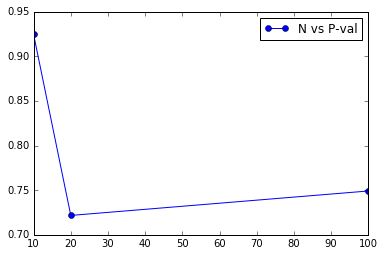

In [85]:
import scipy.stats 
results = []
for N in [ 10, 20, 100]:
    x = np.random.normal(0, 1.0, N)
    y = np.random.normal(0, 1.0, N)
    #t = scipy.stats.ttest_rel( x, y ) # same class in different exams
    t = scipy.stats.ttest_ind(x, y) # boys and girls in the same exam
    results.append( t[1] )
pylab.plot([10,20,100], results, '-o', label = 'N vs P-val' )
pylab.legend( )

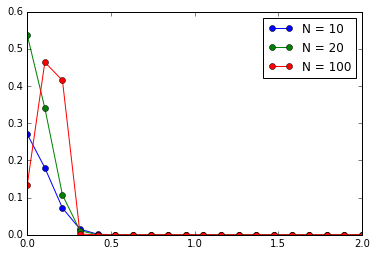

In [87]:
for N in [ 10, 20, 100]:
    results = [ ]
    x = np.random.normal(0, 1.0, N)
    y = np.random.normal(0, 1.0, N)
    xvec = np.linspace(0, 2, 20)
    for dt in xvec:
        y += dt
        t = scipy.stats.ttest_ind(x, y) # boys and girls in the same exam
        results.append( t[1] )
    pylab.plot( xvec, results, '-o', label = 'N = %s' % N )
pylab.legend( )